In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

X = data.drop(columns=['target'])
y = data['target']

# create the RF model with hyperparameters
model = RandomForestClassifier(n_estimators=340)
model.fit(X, y)

# get the importance of the resulting features
imp = model.feature_importances_

# data visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances": imp})
# final_df.set_index('Importances')
final_df =  final_df.sort_values(by = 'Importances', ascending = False) # descending order
print(final_df)

               Features  Importances
10             ST slope     0.180156
2       chest pain type     0.138795
7        max heart rate     0.127334
9               oldpeak     0.107825
4           cholesterol     0.107639
0                   age     0.087757
3          resting bp s     0.080720
8       exercise angina     0.078828
1                   sex     0.043965
6           resting ecg     0.026301
5   fasting blood sugar     0.020679


In [3]:
# ST slope, chest pain type, max heart rate, cholesterol, oldpeak - selected
# age, resting bp s, exercise angina, sex, resting ecg, fasting blood sugar - remove

**Logistic Regression**

Training Accuracy: 0.8077731092436975
Testing Accuracy: 0.8109243697478992


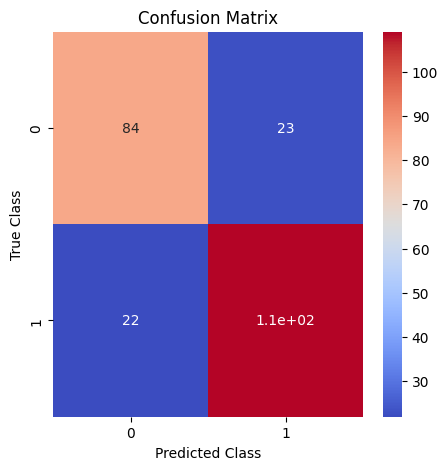

Precision: 0.8257575757575758
Sensitivity: 0.8320610687022901
Specificity: 0.7850467289719626
F1-score: 0.8288973384030418


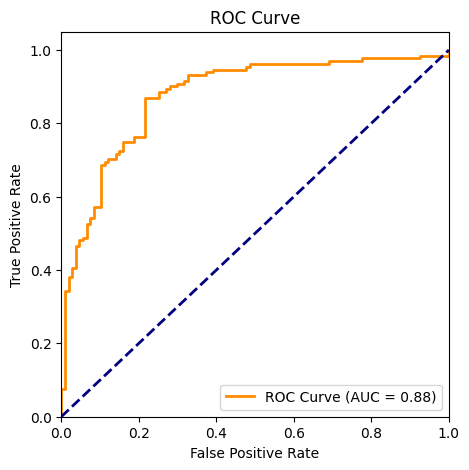

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Multiple Regression**

Accuracy: 0.6680672268907563


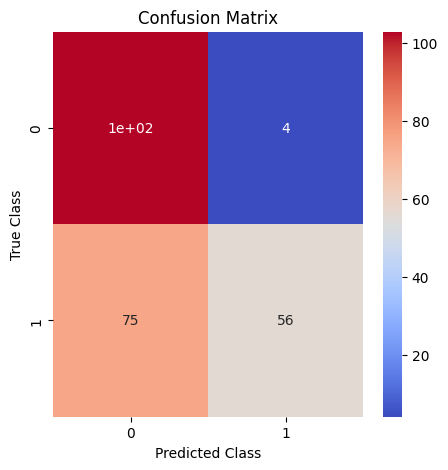

Precision: 0.9333333333333333
Sensitivity: 0.42748091603053434
Specificity: 0.9626168224299065
F1-score: 0.5863874345549738


In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# predictions on the test set
y_pred = regr.predict(X_test)

# applying a threshold of 0.8 to obtain binary predictions
y_pred_binary = np.where(y_pred >= 0.8, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

**Decision Tree**

Training Accuracy: 0.8771008403361344
Testing Accuracy: 0.8445378151260504


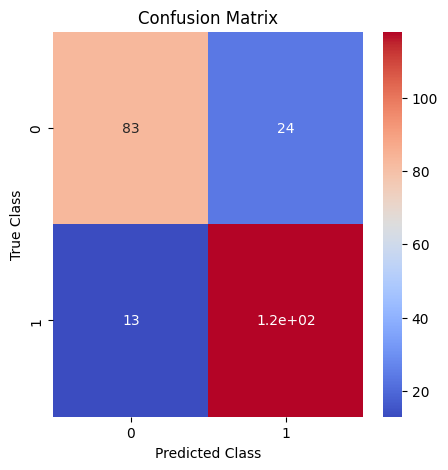

Precision: 0.8309859154929577
Sensitivity: 0.9007633587786259
Specificity: 0.7757009345794392
F1-score: 0.8644688644688645


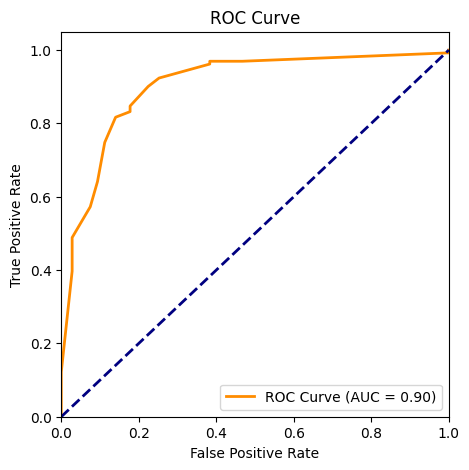

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Random Forest**

Training Accuracy: 0.8781512605042017
Testing Accuracy: 0.8613445378151261


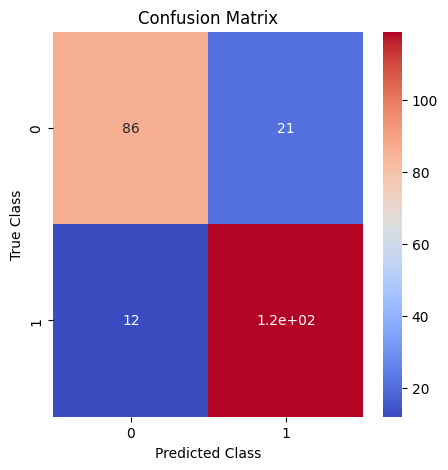

Precision: 0.85
Sensitivity: 0.9083969465648855
Specificity: 0.8037383177570093
F1-score: 0.8782287822878228


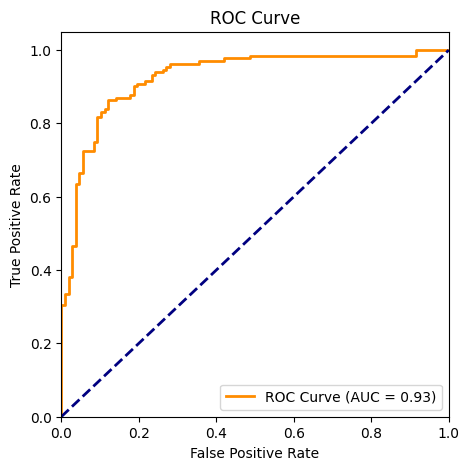

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(max_depth = 5, n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**KNN**

Training Accuracy: 0.7888655462184874
Testing Accuracy: 0.7605042016806722


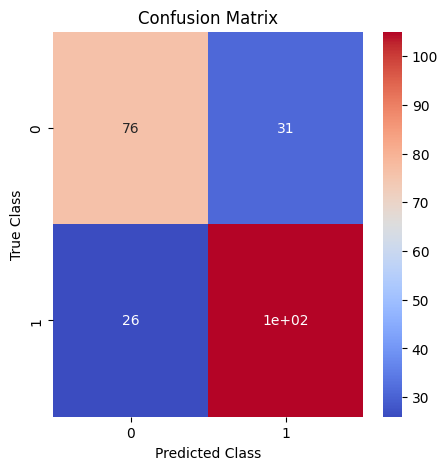

Precision: 0.7720588235294118
Sensitivity: 0.8015267175572519
Specificity: 0.7102803738317757
F1-score: 0.7865168539325843


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**SVM**

Training Accuracy: 0.8067226890756303
Testing Accuracy: 0.8151260504201681


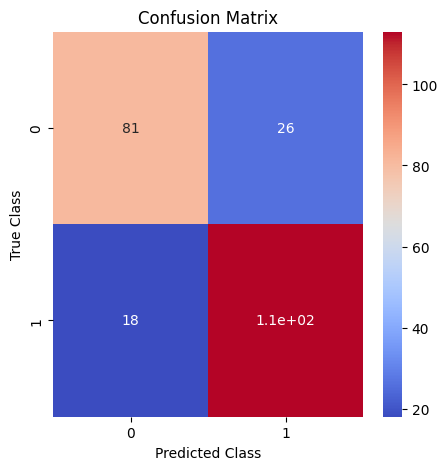

Precision: 0.8129496402877698
Sensitivity: 0.8625954198473282
Specificity: 0.7570093457943925
F1-score: 0.837037037037037


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**Naive Bayes**

Training Accuracy: 0.8109243697478992
Testing Accuracy: 0.7983193277310925


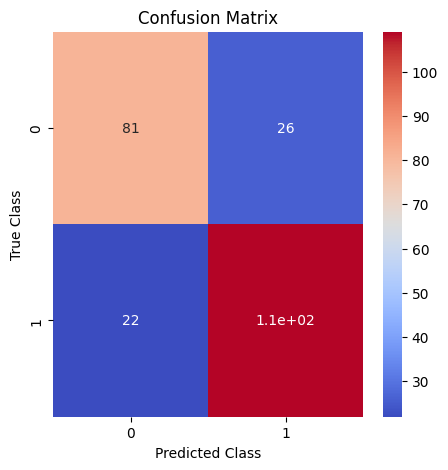

Precision: 0.8074074074074075
Sensitivity: 0.8320610687022901
Specificity: 0.7570093457943925
F1-score: 0.8195488721804511


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

**MLP**

Training Accuracy: 0.792016806722689
Testing Accuracy: 0.7647058823529411


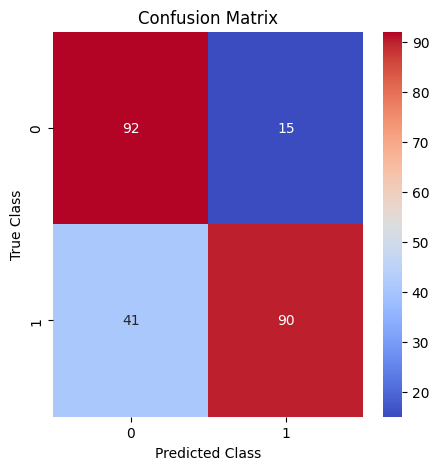

Precision: 0.8571428571428571
Sensitivity: 0.6870229007633588
Specificity: 0.8598130841121495
F1-score: 0.7627118644067795


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**XGBoost**

Training Accuracy: 0.9978991596638656
Testing Accuracy: 0.9243697478991597


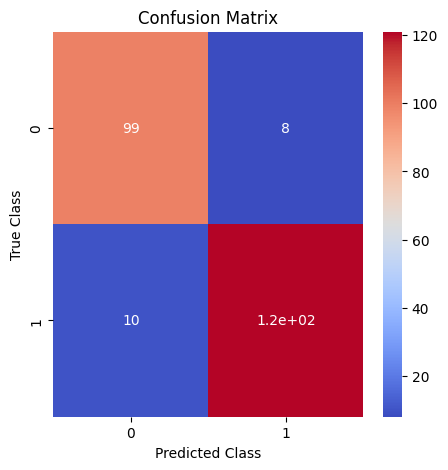

Precision: 0.937984496124031
Sensitivity (Recall): 0.9236641221374046
Specificity: 0.9252336448598131
F1-score: 0.9307692307692308


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


Training Accuracy: 0.9495798319327731
Testing Accuracy: 0.8907563025210085


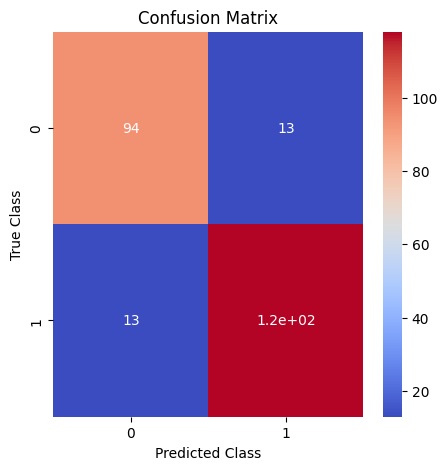

Precision: 0.9007633587786259
Sensitivity (Recall): 0.9007633587786259
Specificity: 0.8785046728971962
F1-score: 0.9007633587786259


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier with overfitting mitigation techniques
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=3,  # Limit tree depth
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used for training
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1.0  # L2 regularization term on weights
)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**AdaBoost**

Training Accuracy: 0.8560924369747899
Testing Accuracy: 0.8487394957983193


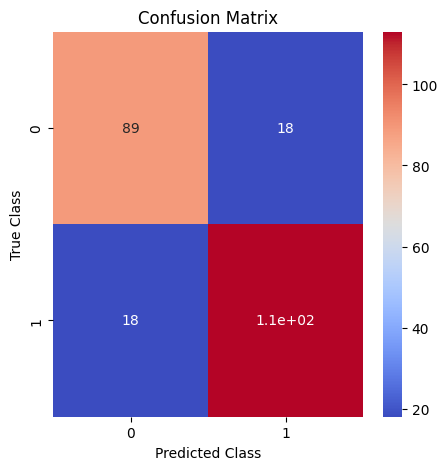

Precision: 0.8625954198473282
Sensitivity (Recall): 0.8625954198473282
Specificity: 0.8317757009345794
F1-score: 0.8625954198473282


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**SGD**

Training Accuracy: 0.7310924369747899
Testing Accuracy: 0.726890756302521


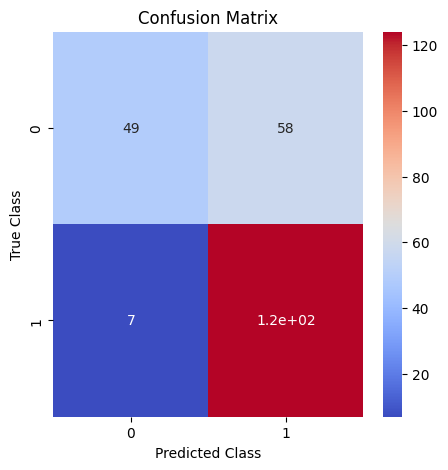

Precision: 0.6813186813186813
Sensitivity (Recall): 0.9465648854961832
Specificity: 0.45794392523364486
F1-score: 0.7923322683706071


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SGD Classifier
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


Training Accuracy: 0.5336134453781513
Testing Accuracy: 0.5126050420168067


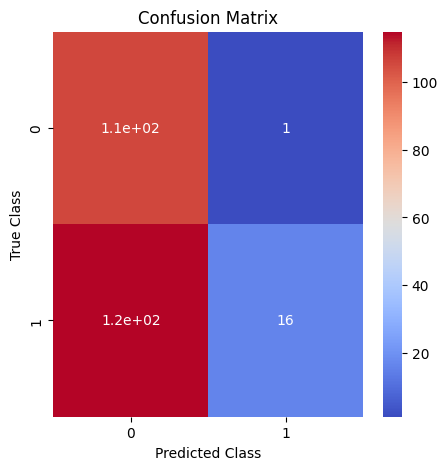

Precision: 0.9411764705882353
Sensitivity (Recall): 0.12213740458015267
Specificity: 0.9906542056074766
F1-score: 0.2162162162162162


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an SGD Classifier
sgd_model = SGDClassifier(
    loss="hinge",  # The loss function (hinge for linear SVM)
    penalty="l2",  # Regularization term (l2 for Ridge regularization)
    alpha=0.001,  # Regularization strength
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**Gradient Boosting Classifier**

Training Accuracy: 0.9852941176470589
Testing Accuracy: 0.9159663865546218


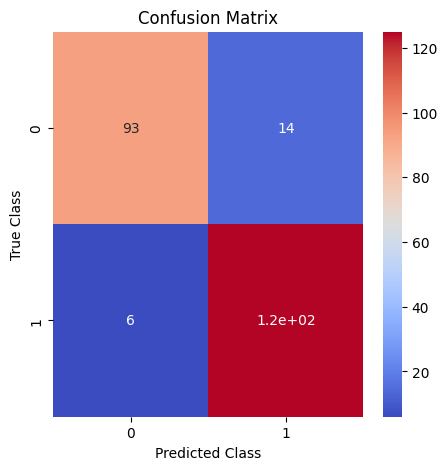

Precision: 0.8992805755395683
Sensitivity (Recall): 0.9541984732824428
Specificity: 0.8691588785046729
F1-score: 0.9259259259259259


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be used
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

gb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**Extra Tree Classifier**

Training Accuracy: 0.8571428571428571
Testing Accuracy: 0.8529411764705882


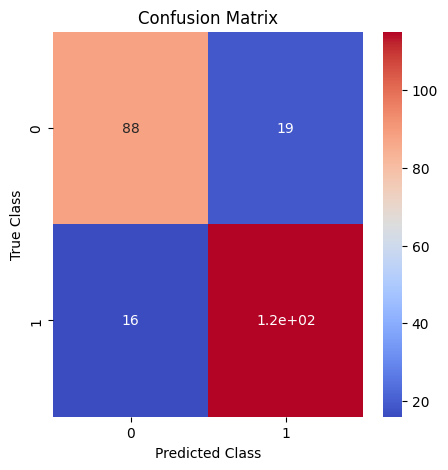

Precision: 0.8582089552238806
Sensitivity (Recall): 0.8778625954198473
Specificity: 0.822429906542056
F1-score: 0.8679245283018869


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

extra_trees_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = extra_trees_model.predict(X_train)
y_test_pred = extra_trees_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**RNN**

Epoch 1/100
24/24 - 4s - loss: 0.5017 - accuracy: 0.7858 - val_loss: 0.5046 - val_accuracy: 0.7696 - 4s/epoch - 146ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4110 - accuracy: 0.8279 - val_loss: 0.4941 - val_accuracy: 0.7801 - 163ms/epoch - 7ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3925 - accuracy: 0.8357 - val_loss: 0.4836 - val_accuracy: 0.7958 - 167ms/epoch - 7ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3824 - accuracy: 0.8344 - val_loss: 0.4872 - val_accuracy: 0.7906 - 175ms/epoch - 7ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3756 - accuracy: 0.8410 - val_loss: 0.4796 - val_accuracy: 0.7906 - 179ms/epoch - 7ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3693 - accuracy: 0.8489 - val_loss: 0.4812 - val_accuracy: 0.7958 - 160ms/epoch - 7ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3647 - accuracy: 0.8449 - val_loss: 0.4789 - val_accuracy: 0.7853 - 162ms/epoch - 7ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3577 - accuracy: 0.8476 - val_loss: 0.4867 - val_accuracy: 0.7906 - 172ms/epoch - 7ms/step
Epoch 9/1

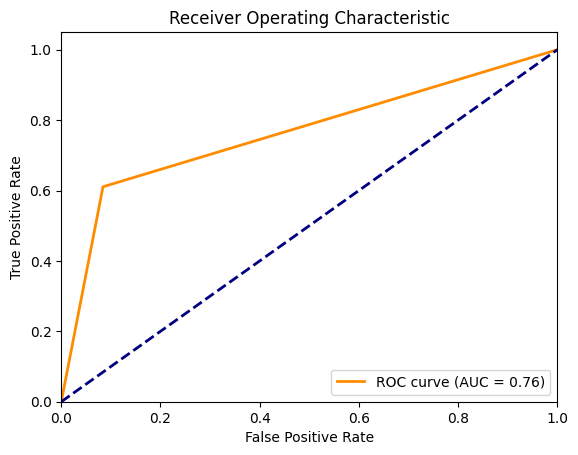

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for SimpleRNN input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the RNN model using SimpleRNN
model = keras.Sequential([
    layers.SimpleRNN(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**LSTM**

Epoch 1/100
24/24 - 6s - loss: 0.6866 - accuracy: 0.6610 - val_loss: 0.6769 - val_accuracy: 0.6859 - 6s/epoch - 234ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6151 - accuracy: 0.7884 - val_loss: 0.5647 - val_accuracy: 0.7696 - 260ms/epoch - 11ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4682 - accuracy: 0.8226 - val_loss: 0.5127 - val_accuracy: 0.7749 - 265ms/epoch - 11ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4258 - accuracy: 0.8160 - val_loss: 0.4922 - val_accuracy: 0.7801 - 283ms/epoch - 12ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4126 - accuracy: 0.8160 - val_loss: 0.4909 - val_accuracy: 0.7906 - 273ms/epoch - 11ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4055 - accuracy: 0.8187 - val_loss: 0.4891 - val_accuracy: 0.8010 - 257ms/epoch - 11ms/step
Epoch 7/100
24/24 - 0s - loss: 0.4014 - accuracy: 0.8239 - val_loss: 0.4854 - val_accuracy: 0.8063 - 260ms/epoch - 11ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3959 - accuracy: 0.8279 - val_loss: 0.4895 - val_accuracy: 0.8115 - 261ms/epoch - 11ms/step
Ep

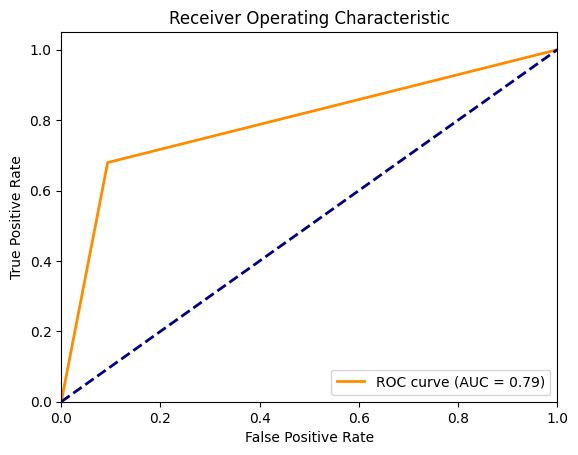

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**GRU**

Epoch 1/100
24/24 - 7s - loss: 0.6459 - accuracy: 0.7687 - val_loss: 0.5814 - val_accuracy: 0.7644 - 7s/epoch - 277ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4572 - accuracy: 0.8252 - val_loss: 0.5041 - val_accuracy: 0.7801 - 263ms/epoch - 11ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4160 - accuracy: 0.8292 - val_loss: 0.4909 - val_accuracy: 0.7958 - 247ms/epoch - 10ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4042 - accuracy: 0.8187 - val_loss: 0.4839 - val_accuracy: 0.8010 - 248ms/epoch - 10ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3951 - accuracy: 0.8292 - val_loss: 0.4854 - val_accuracy: 0.7958 - 246ms/epoch - 10ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3866 - accuracy: 0.8331 - val_loss: 0.4844 - val_accuracy: 0.8115 - 262ms/epoch - 11ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3823 - accuracy: 0.8397 - val_loss: 0.4818 - val_accuracy: 0.8063 - 298ms/epoch - 12ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3750 - accuracy: 0.8436 - val_loss: 0.4883 - val_accuracy: 0.8063 - 238ms/epoch - 10ms/step
Ep

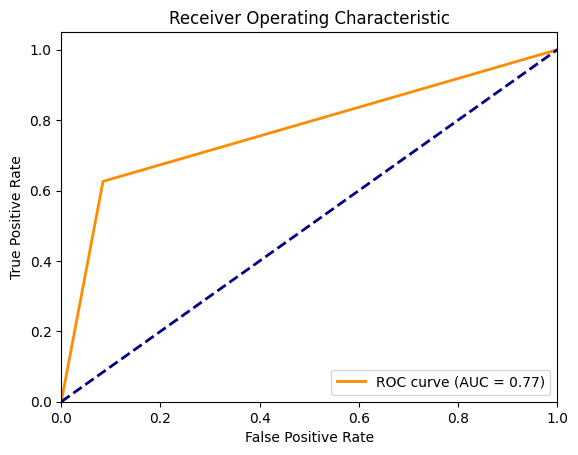

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for GRU input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the GRU model
model = keras.Sequential([
    layers.GRU(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiLSTM**

Epoch 1/100
24/24 - 8s - loss: 0.6870 - accuracy: 0.7372 - val_loss: 0.6764 - val_accuracy: 0.7330 - 8s/epoch - 350ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6022 - accuracy: 0.8029 - val_loss: 0.5412 - val_accuracy: 0.7696 - 317ms/epoch - 13ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4400 - accuracy: 0.8252 - val_loss: 0.5056 - val_accuracy: 0.7906 - 319ms/epoch - 13ms/step
Epoch 4/100
24/24 - 0s - loss: 0.4118 - accuracy: 0.8160 - val_loss: 0.4940 - val_accuracy: 0.7906 - 345ms/epoch - 14ms/step
Epoch 5/100
24/24 - 0s - loss: 0.4057 - accuracy: 0.8239 - val_loss: 0.4992 - val_accuracy: 0.7958 - 330ms/epoch - 14ms/step
Epoch 6/100
24/24 - 0s - loss: 0.4005 - accuracy: 0.8252 - val_loss: 0.4911 - val_accuracy: 0.8010 - 306ms/epoch - 13ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3957 - accuracy: 0.8265 - val_loss: 0.4918 - val_accuracy: 0.8010 - 301ms/epoch - 13ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3915 - accuracy: 0.8344 - val_loss: 0.4960 - val_accuracy: 0.8115 - 356ms/epoch - 15ms/step
Ep

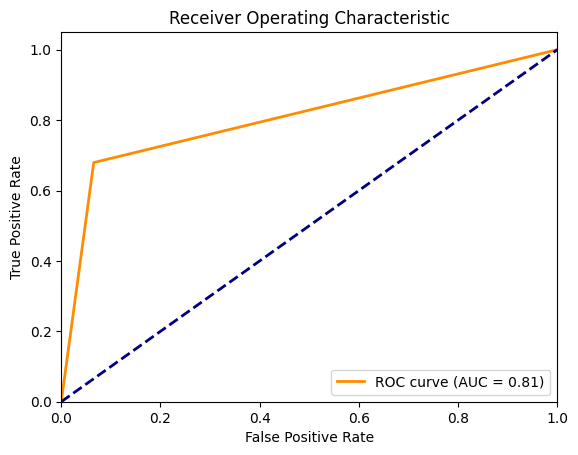

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.LSTM(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiGRU**

Epoch 1/100
24/24 - 9s - loss: 0.6448 - accuracy: 0.7753 - val_loss: 0.5718 - val_accuracy: 0.7644 - 9s/epoch - 381ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4467 - accuracy: 0.8239 - val_loss: 0.5334 - val_accuracy: 0.7801 - 340ms/epoch - 14ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4067 - accuracy: 0.8318 - val_loss: 0.4823 - val_accuracy: 0.7958 - 330ms/epoch - 14ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3919 - accuracy: 0.8265 - val_loss: 0.4880 - val_accuracy: 0.7749 - 301ms/epoch - 13ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3843 - accuracy: 0.8331 - val_loss: 0.4796 - val_accuracy: 0.8063 - 307ms/epoch - 13ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3746 - accuracy: 0.8436 - val_loss: 0.4742 - val_accuracy: 0.7958 - 312ms/epoch - 13ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3678 - accuracy: 0.8423 - val_loss: 0.4735 - val_accuracy: 0.7906 - 341ms/epoch - 14ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3596 - accuracy: 0.8541 - val_loss: 0.4814 - val_accuracy: 0.7958 - 298ms/epoch - 12ms/step
Ep

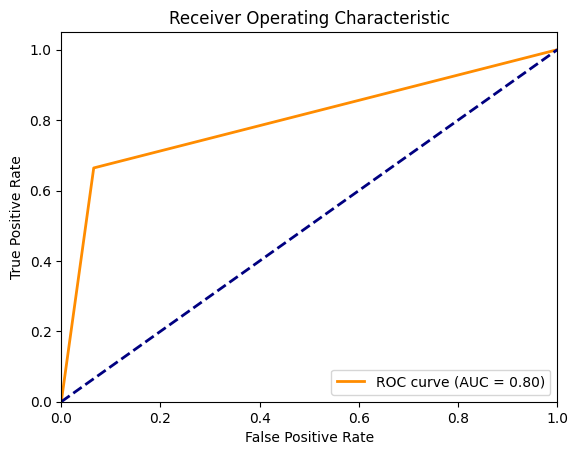

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.GRU(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.GRU(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.GRU(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**CatBoost**

0:	learn: 0.5340207	test: 0.5418589	best: 0.5418589 (0)	total: 56.6ms	remaining: 5.61s
10:	learn: 0.3218316	test: 0.3511169	best: 0.3505330 (9)	total: 66.8ms	remaining: 540ms
20:	learn: 0.2810141	test: 0.3445811	best: 0.3445811 (20)	total: 76ms	remaining: 286ms
30:	learn: 0.2516697	test: 0.3395854	best: 0.3361549 (26)	total: 84.7ms	remaining: 188ms
40:	learn: 0.2313355	test: 0.3316409	best: 0.3301483 (39)	total: 93.4ms	remaining: 134ms
50:	learn: 0.2128589	test: 0.3182699	best: 0.3181889 (49)	total: 102ms	remaining: 98.4ms
60:	learn: 0.1926748	test: 0.3100576	best: 0.3100576 (60)	total: 112ms	remaining: 71.4ms
70:	learn: 0.1749100	test: 0.2999135	best: 0.2992159 (69)	total: 119ms	remaining: 48.7ms
80:	learn: 0.1644829	test: 0.2970507	best: 0.2970507 (80)	total: 129ms	remaining: 30.2ms
90:	learn: 0.1582763	test: 0.2970561	best: 0.2963085 (84)	total: 138ms	remaining: 13.6ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2963084919
bestIteration = 84

Shrink model to 

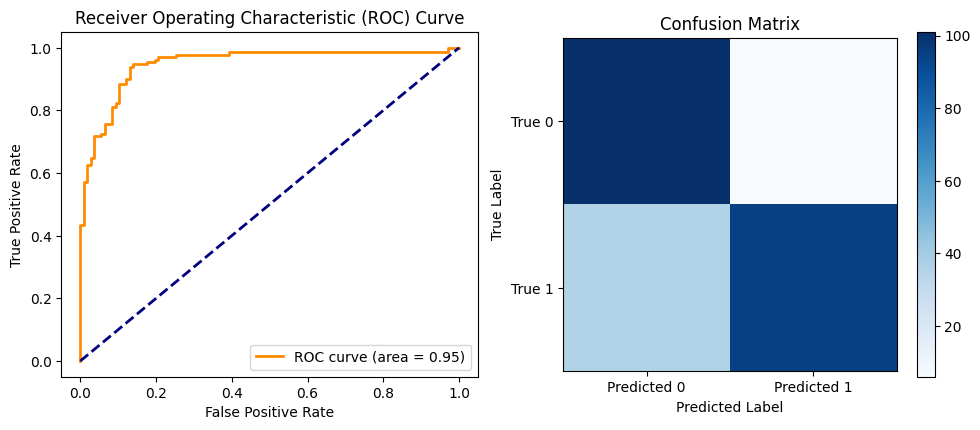

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the CatBoost model
cat_features = []  # You can specify categorical features here
model = CatBoostClassifier(iterations=100, depth=7, learning_rate=0.5, loss_function='Logloss', random_seed=0)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()

**LightGBM**

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.313844
[20]	valid_0's binary_logloss: 0.272152
[30]	valid_0's binary_logloss: 0.263526
[40]	valid_0's binary_logloss: 0.26159
Test Accuracy: 0.8865546218487395
Precision: 0.956140350877193
Sensitivity (Recall): 0.8320610687022901
Specificity: 0.9532710280373832
F1 Score: 0.889795918367347
Confusion Matrix:
[[102   5]
 [ 22 109]]


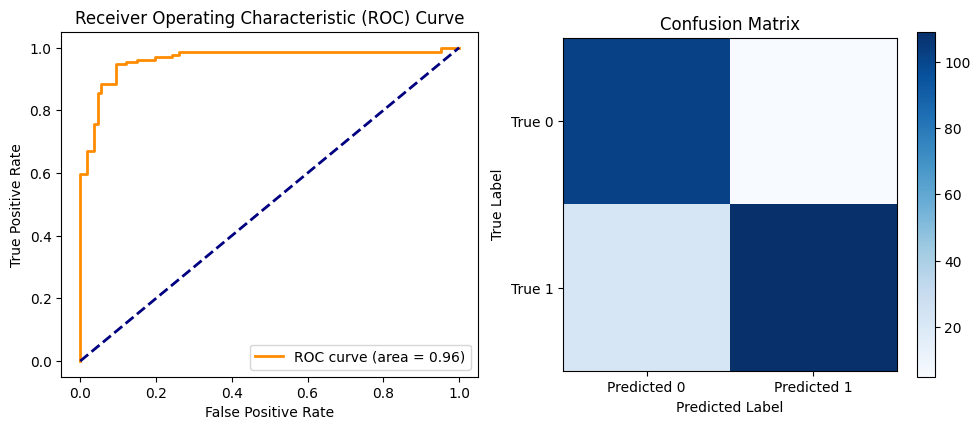

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "exercise angina", "sex", "resting ecg", "fasting blood sugar", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the LightGBM model
model = LGBMClassifier(n_estimators=100, max_depth=7, learning_rate=0.5, random_state=42, boosting_type='gbdt')

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()